In [17]:
import warnings
warnings.filterwarnings('ignore')
# formula y = (x1 + x2) / x3  + x4 * x5

# Create a data set of 1000 objects: feature values are pseudo-random numbers uniformly distributed over the interval (1; 3)
import numpy as np

x1 = np.random.uniform(1, 3, 1000)
x2 = np.random.uniform(1, 3, 1000)
x3 = np.random.uniform(1, 3, 1000)
x4 = np.random.uniform(1, 3, 1000)
x5 = np.random.uniform(1, 3, 1000)
y = (x1 + x2) / x3 + x4 * x5

In [18]:
import pandas as pd

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'y': y})
df.head()

,x1,x2,x3,x4,x5,y
0,1.218485,1.858140,2.572106,1.404423,2.075966,4.111686
1,1.513753,2.951373,1.626498,1.181168,1.023758,3.954468
2,1.115419,2.536814,2.054208,2.758397,1.986416,7.257252
3,1.361780,1.452677,1.534471,2.842575,1.727793,6.745534
4,1.663189,2.508776,2.518290,1.278332,2.000133,4.213501


In [19]:
# Split the data into training / test sets (training set - 70% of all available data).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['x1', 'x2', 'x3', 'x4', 'x5']], df['y'],
    test_size=0.3,
    random_state=0
)

In [20]:
# Create a neural network with one hidden layer consisting of two neurons using tensorflow. Train it on the training dataset. Set the maximum number of epochs to 50.
from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(hidden_layer_sizes=(2,), max_iter=50)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(2,), max_iter=50)

In [21]:
# Print the approximate values of the function and network prediction for the test sample, as well as the network error on the test sample.
print('y = (x1 + x2) / x3  + x4 * x5')
print('y_pred =', mlp.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]))
print('y_test =', y_test.iloc[0])
print('error =', np.abs(mlp.predict([[1.5, 2.5, 1.5, 1.5, 1.5]]) - y_test.iloc[0]))

y = (x1 + x2) / x3  + x4 * x5
y_pred = [4.22662663]
y_test = 3.9539592418819645
error = [0.27266739]


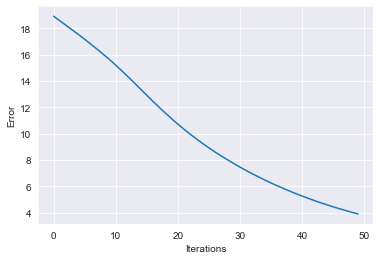

In [22]:
# Display a graph of network errors on the training and test sets depending on the number of iterations.
import matplotlib.pyplot as plt


plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()